# RandomVector : correction des exercices

In [1]:
import openturns as ot

## Solution de l'exercice 1 : une fonction à trois entrées

In [2]:
inputDistribution = ot.Normal(3)
inputRandomVector = ot.RandomVector(inputDistribution)
symbolicSimulator = ot.SymbolicFunction(
    ["X1", "X2", "X3"], ["X1 + X2 + X3", "X1 - X2 * X3"]
)
outputRandomVector = ot.CompositeRandomVector(symbolicSimulator, inputRandomVector)

## Solution de l'exercice 2 : quatre conversions

1. On peut toujours convertir un `RandomVector` en `RandomVector` : facile.

In [3]:
print(ot.RandomVector(inputRandomVector))

class=RandomVector implementation=class=UsualRandomVector distribution=class=Normal name=Normal dimension=3 mean=class=Point name=Unnamed dimension=3 values=[0,0,0] sigma=class=Point name=Unnamed dimension=3 values=[1,1,1] correlationMatrix=class=CorrelationMatrix dimension=3 implementation=class=MatrixImplementation name=Unnamed rows=3 columns=3 values=[1,0,0,0,1,0,0,0,1]


2. On peut toujours convertir une `Distribution` en `Distribution` : bien sûr.

In [4]:
print(ot.Distribution(inputDistribution))

Normal(mu = [0,0,0], sigma = [1,1,1], R = [[ 1 0 0 ]
 [ 0 1 0 ]
 [ 0 0 1 ]])


3. On peut toujours convertir une `Distribution` en `RandomVector` : puisque la distribution est connue, cette conversion ne pose aucun problème.

In [5]:
print(ot.RandomVector(inputDistribution))

class=RandomVector implementation=class=UsualRandomVector distribution=class=Normal name=Normal dimension=3 mean=class=Point name=Unnamed dimension=3 values=[0,0,0] sigma=class=Point name=Unnamed dimension=3 values=[1,1,1] correlationMatrix=class=CorrelationMatrix dimension=3 implementation=class=MatrixImplementation name=Unnamed rows=3 columns=3 values=[1,0,0,0,1,0,0,0,1]


4. On ne peut pas convertir un `RandomVector` en `Distribution`.

In [ ]:
# Dé-commenter la ligne ci-dessous (génère une exception)
# ot.Distribution(inputRandomVector)

L'instruction précédente génère le message suivant :

`TypeError: InvalidArgumentException : Error: the given object does not have a computeCDF() method.`

Le message d'erreur indique que l'objet ne dispose pas de la méthode `computeCDF()`, nécessaire pour évaluer la fonction de répartition. En effet, la distribution n'est pas connue dans le vecteur aléatoire `inputRandomVector` : il est donc impossible de créer la `JointDistribution`. 

## Solution de l'exercice 3 : composition de RandomVector

On peut composer deux `RandomVector`. 

In [7]:
def simulator(x):
    y0 = x[0] + x[1] + x[2]
    y1 = x[0] - x[1] * x[2]
    y = [y0, y1]
    return y

Définissons le vecteur aléatoire associé à la composition de la fonction `simulator` par la fonction `simulator2`, c’est-à-dire `Y = simulator2(simulator(X))`.

In [8]:
inputDistribution = ot.Normal(3)
inputRandomVector = ot.RandomVector(inputDistribution)
function = ot.PythonFunction(3, 2, simulator)
outputRandomVector = ot.CompositeRandomVector(function, inputRandomVector)
outputRandomVector.getSample(5)

,y0,y1
0,-1.096237,0.05328151
1,-0.6258649,1.969055
2,1.89291,-1.520139
3,0.5836483,0.9159716
4,-4.884728,-3.972927


In [9]:
print(outputRandomVector)

class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0,y1] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0,y1] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0,y1] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0,y1] parameter=class=Point name=Unnamed dimension=0 values=[] antecedent=class=UsualRandomVector distribution=class=Normal name=Normal dimension=3 mean=cla

In [10]:
def simulator2(x):
    y0 = x[0] + x[1]
    y1 = x[1] ** 2
    y = [y0, y1]
    return y

In [11]:
function2 = ot.PythonFunction(2, 2, simulator2)
outputRandomVector2 = ot.CompositeRandomVector(function2, outputRandomVector)
outputRandomVector2.getSample(5)

,y0,y1
0,0.8136389,0.002311912
1,-0.4958562,0.4957081
2,-1.892551,0.1967345
3,1.217256,0.268033
4,2.908416,3.375364


Alternative : composer les deux fonctions, puis créer le `RandomVector`. Définissons la fonction `simulator3` créée par composition de `simulator2` et `simulator`.

In [12]:
function3 = ot.ComposedFunction(function2, function)
outputRandomVector3 = ot.CompositeRandomVector(function3, inputRandomVector)
outputRandomVector3.getSample(5)

,y0,y1
0,-3.903554,1.329023
1,1.801122,0.9455742
2,2.002351,0.5853328
3,0.7202945,0.247744
4,-1.066703,0.03565327


D'une manière générale, la bibliothèque permet de composer des fonctions définies de manière abstraite. Toutefois, une méthode plus directe dans notre cas particulier consiste à définir une nouvelle fonction qui évalue d'abord `function`, puis `function2`.

In [13]:
def compositeFunction(x):
    y = function(x)
    y2 = function2(y)
    return y2

## Solution de l'exercice 4 :  la classe CompositeDistribution

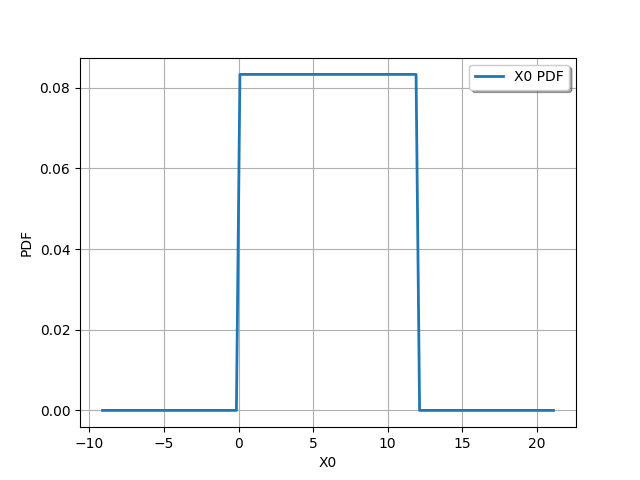

In [14]:
distributionX = ot.Uniform(0.0, 12.0)
distributionX.drawPDF()

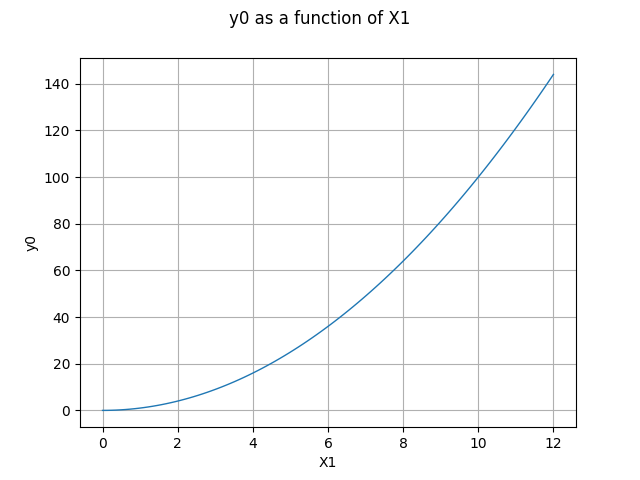

In [15]:
symbolicFunction = ot.SymbolicFunction(["X1"], ["X1^2"])
symbolicFunction.draw(0, 12, 100)

In [16]:
outputDistEx4 = ot.CompositeDistribution(symbolicFunction, distributionX)

Dessine la distribution de $Y$.

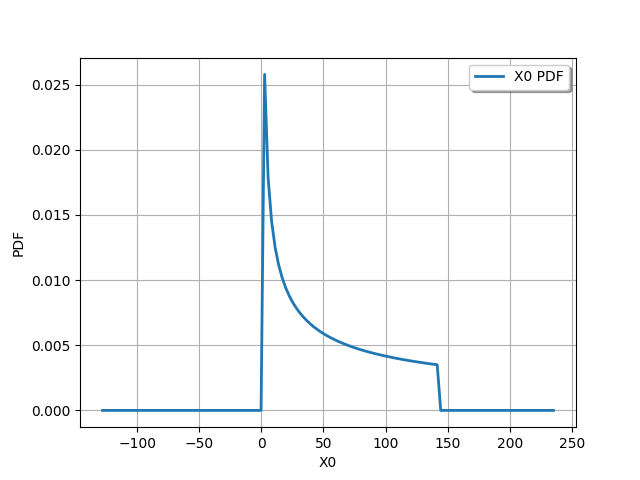

In [17]:
outputDistEx4.drawPDF()